# Python machine learning: supervised classification


*List of Topics*:
1. Load the test dataset and start exploring the dataset
2. Visualize and further explore the dataset
3. Preparing the dataset for machine learning
4. Predictions using machine learning algorithms

## Load the UCI IRIS dataset and explore the dataset
Data description is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names)

In [2]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris = pd.read_csv(url, names=colnames)

The following functions are provided by the pandas package.
Find the dataset dimensions

In [29]:
print(iris.shape)

(150, 5)


Print the data type:

In [30]:
print type(iris)

<class 'pandas.core.frame.DataFrame'>


Print the first 10 rows of data. Note the 'species' is not numerical data type. The first 4 columns are measurements of petal and sepal.

In [54]:
print(iris.head(6))

   sepal-length  sepal-width  petal-length  petal-width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa


In [53]:
print(iris.tail())

     sepal-length  sepal-width  petal-length  petal-width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


![flower](flower1.jpg)

Print the first two rows (0, 1) and all the columns

In [119]:
print(iris.iloc[:2,])

   sepal-length  sepal-width  petal-length  petal-width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa


Print data types. An object data type is of categorical data. 

In [120]:
print(iris.dtypes)

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
species          object
dtype: object


Print the dataset summary statistics for numerical data.

In [40]:
print(iris.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Group the data by 'species' and print the size of each species. All three species are equally distributed at 50s each.

In [122]:
print(iris.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


![Three Iris species](iris1.png)

Now that we have basic understanding of the data, let's try to ask some questions:
1. Can we determine the associations between any variables?
2. Can we identify dependent and independent variables to create models for predictions?

## Visualize and explore

In [3]:
#import scipy
#import numpy
#import matplotlib
#from pandas.plotting import scatter_matrix
#import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Histogram for frequency per column

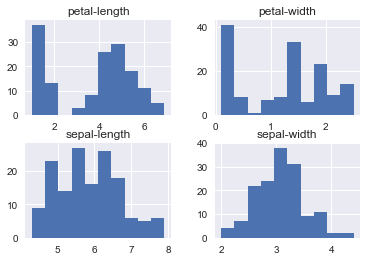

In [51]:
iris.hist();

### Scattered pairwise plot to quickly explore the relationships
Separating by species reveals more information.

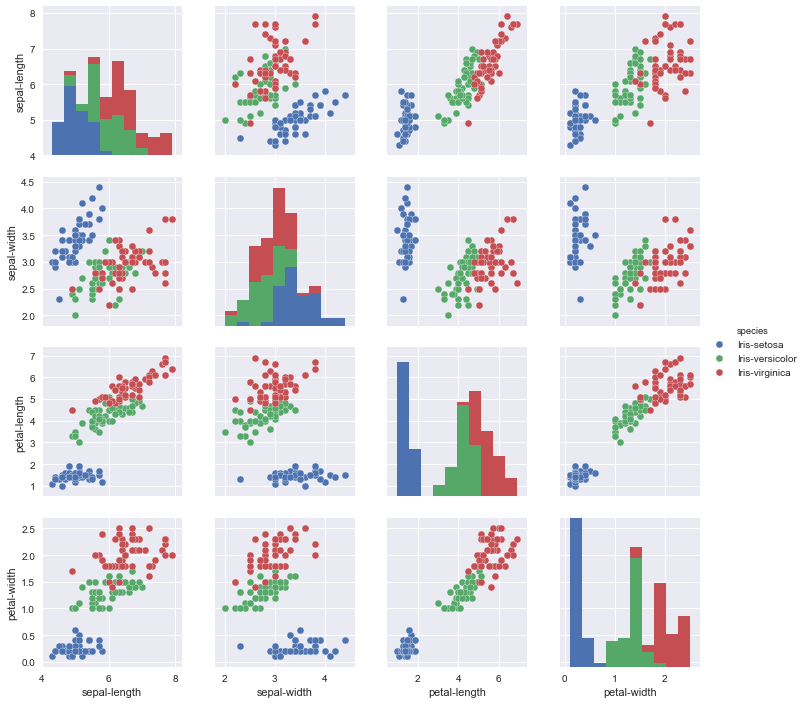

In [55]:
sb.set(color_codes=True)
sb.pairplot(iris, hue='species');

Print some correlation information between the variables

In [ ]:
iris.corr()

### Pairgrid
This is another way to look at the pairwise data relationships by plotting the grids.

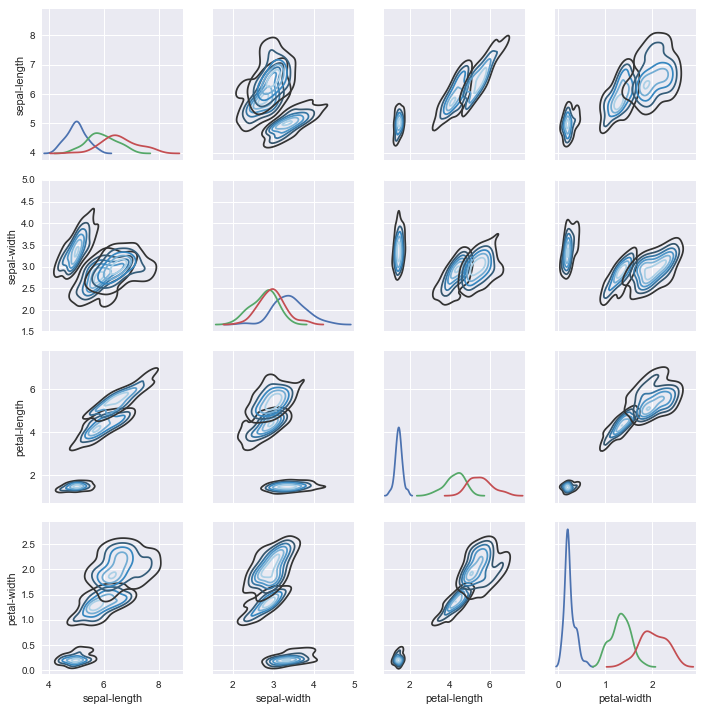

In [4]:
g = sb.PairGrid(iris, hue="species")
g.map_diag(sb.kdeplot)
g.map_offdiag(sb.kdeplot, cmap="Blues_d", n_levels=6);

### Kernel density plot between a pair of variables
KDE = Kernel density estimate

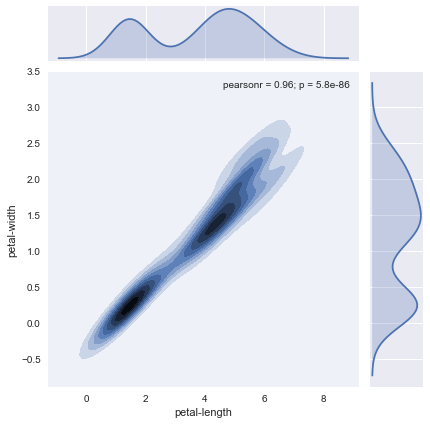

In [5]:
sb.jointplot(x="petal-length", y="petal-width", data=iris, kind="kde");

### Fitting a linear regression
how to print the regression parameters??

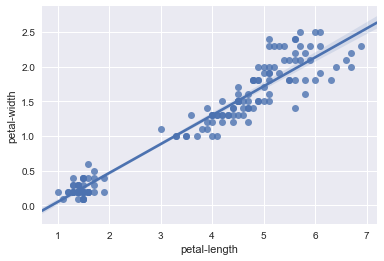

In [9]:
sb.regplot(x="petal-length", y="petal-width", data=iris);

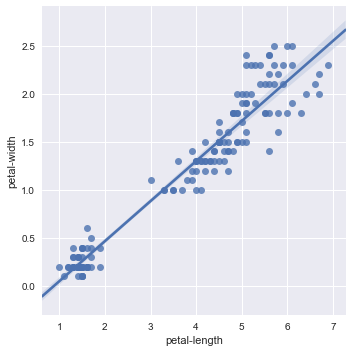

In [11]:
sb.lmplot(x="petal-length", y="petal-width", data=iris);

This plot will also show the r coefficient and p value.

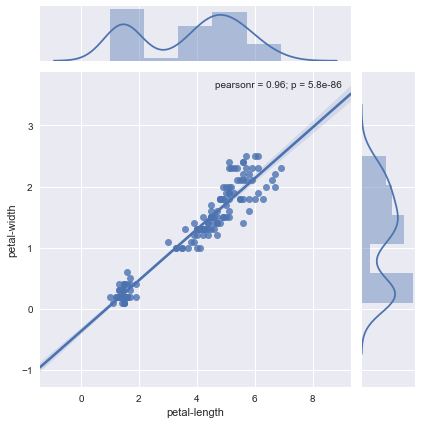

In [13]:
sb.jointplot(x="petal-length", y="petal-width", data=iris, kind="reg");

### Create a box plot

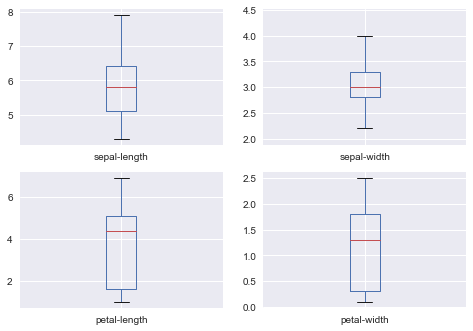

In [152]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False);

## Create a test dataset and a training dataset

First take the dataset values, use the first 4 columns as X and column 5 as Y. Essentially we will use the first 4 columns as independent variables and column 5 as the dependent variable. This is an example of labeled dataset, where first 4 columns are referred as features and the last column is referred as classes. The goal of the machine learning exercise is to build a model that will predict the Iris species for a given set of measurements in sepal-length, sepal-width, petal-length, and petal-width.

In [3]:
#method 1: get the values and specify the columns
#array = iris.values
#X = array[:,0:4]
#Y = array[:,4]

##method 2: get the columns by header and take the values without headers
X = iris[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']].values
Y = iris[['species']].values

Use sklearn train_test_split function to randomly split the dataset into train sub-dataset and test sub-dataset
This function takes the original X and Y with a test size and a random seed, returns X for training and test and Y for training and test. The training dataset will be used to build a model while the test dataset will be used for model validation.

In [4]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

## Perform machine learning using a number of algorithms

### First import these libraries

We will use 3 common algorithms to make predictions: Logistic Regression, K Nearest Neighbors, Support Vector Machine 

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Use these metrics to evaluate each model:

In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Logistic Regression (LR)
LR is often used to classify a dataset when dependent variable is categorical. In the iris dataset, Y has three classes (species). The goal of classification is to build a model to predict which species it is for a given set of X values.
The fit function will generate a model based on the training dataset. 

In [14]:
LR = LogisticRegression()
LR.fit(X_train, Y_train);


The predict function will predict Y for given X test dataset.

In [11]:
LR_pred = LR.predict(X_test)

Now we can validate our predictions. First we can check the accuracy. Accuracy measures how close the predicted value is to the true observed value. The accuracy score is computed with number of correct predictions over total predictions.

In [71]:
print(accuracy_score(Y_test, LR_pred))

0.8


Now take a look at the confusion matrix.

In [72]:
print(confusion_matrix(Y_test, LR_pred))

[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]


lastly look at the classification report.

In [73]:
print(classification_report(Y_test, LR_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.58      0.70        12
 Iris-virginica       0.67      0.91      0.77        11

    avg / total       0.83      0.80      0.80        30



### K Nearest Neighbor (KNN)

In [37]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, Y_train)
KNN_pred = KNN.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(Y_test, KNN_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, KNN_pred))
print("\nClassification Report:")
print(classification_report(Y_test, KNN_pred))

Accuracy Score:
0.9

Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



### Support Vector Machine (SVM)

In [216]:
SVM = SVC()
SVM.fit(X_train, Y_train)
SVM_pred = SVM.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(Y_test, SVM_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, SVM_pred))
print("\nClassification Report:")
print(classification_report(Y_test, SVM_pred))

Accuracy Score:
0.933333333333

Confusion Matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



## Additional machine learning algorithms

### Linear Discriminant Analysis (LDA)


In [8]:
##using the existing training and test datasets created previously
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
LDA_pred = LDA.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(Y_test, LDA_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, LDA_pred))
print("\nClassification Report:")
print(classification_report(Y_test, LDA_pred))

Accuracy Score:
0.966666666667

Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.97      0.97      0.97        30



### Gaussian Naive Bayes (GNB)

In [10]:
##using the existing training and test datasets created previously
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
GNB_pred = GNB.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(Y_test, GNB_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, GNB_pred))
print("\nClassification Report:")
print(classification_report(Y_test, GNB_pred))

Accuracy Score:
0.833333333333

Confusion Matrix:
[[7 0 0]
 [0 9 3]
 [0 2 9]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

    avg / total       0.84      0.83      0.83        30



### Decision Tree Classifier (DTC)

In [11]:
##using the existing training and test datasets created previously
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
DTC_pred = LDA.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(Y_test, DTC_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, DTC_pred))
print("\nClassification Report:")
print(classification_report(Y_test, DTC_pred))

Accuracy Score:
0.966666666667

Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.97      0.97      0.97        30



### Neural Network Classifier using Multilayer Perceptron
It trains using back propagation.

In [13]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()
MLP.fit(X_train, Y_train.ravel())
MLP_pred = MLP.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(Y_test, MLP_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, MLP_pred))
print("\nClassification Report:")
print(classification_report(Y_test, MLP_pred))

Accuracy Score:
0.933333333333

Confusion Matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



### Stochastic Gradient Descent Classifier

In [22]:
##using the existing training and test datasets created previously
##Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

In [17]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss="hinge", penalty="l2")
SGD.fit(X_train, Y_train)
SGD_pred = SGD.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(Y_test, SGD_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, SGD_pred))
print("\nClassification Report:")
print(classification_report(Y_test, SGD_pred))

Accuracy Score:
0.7

Confusion Matrix:
[[6 1 0]
 [4 7 1]
 [0 3 8]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.60      0.86      0.71         7
Iris-versicolor       0.64      0.58      0.61        12
 Iris-virginica       0.89      0.73      0.80        11

    avg / total       0.72      0.70      0.70        30

